# WGAN-GP Training

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP

import pickle

In [4]:
BATCH_SIZE = 64


In [5]:
from PIL import Image
import numpy as np
IMAGE_SIZE = 64

source_path = './images/miro/square/'
X_data = []


for count, filename in enumerate(os.listdir(source_path)):
    f = os.path.join(source_path, filename)
    image = Image.open(f).convert('RGB').resize((IMAGE_SIZE, IMAGE_SIZE))
    X_data.append(np.array(image))

x_train = np.array(X_data)
print('x_train shape:', x_train.shape)

x_train shape: (937, 64, 64, 3)


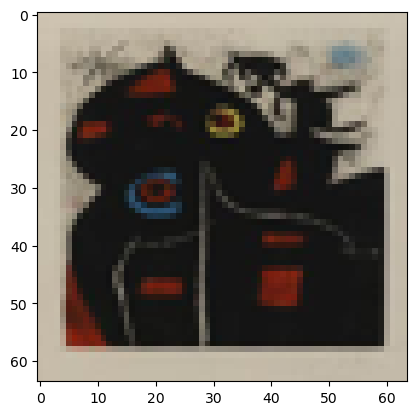

In [6]:
plt.imshow(x_train[99,:,:,:])

## architecture

In [7]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2023-04-04 18:50:59.570799: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-04-04 18:50:59.613745: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-04 18:50:59.613761: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pappa-GP66-Leopard-11UH): /proc/driver/nvidia/version does not exist


InvocationException: GraphViz's executables not found

In [8]:
gan.critic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0     

In [9]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024

## training

In [10]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [12]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = False
)

2023-04-04 18:25:36.687622: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-04-04 18:25:36.713400: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2304000000 Hz
2023-04-04 18:25:36.715109: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0560000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-04-04 18:25:36.715131: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


0 (5, 1) [D loss: (-3005.3)(R -3010.1, F 0.1, G 0.5)] [G loss: -5.3]
1 (5, 1) [D loss: (-94198.5)(R -94645.6, F 7.7, G 43.9)] [G loss: -154.1]
2 (5, 1) [D loss: (-1032262.3)(R -1109163.0, F 145.1, G 7675.6)] [G loss: -1956.8]
3 (5, 1) [D loss: (-4480504.0)(R -6905923.0, F 1184.2, G 242423.5)] [G loss: -11580.5]
4 (5, 1) [D loss: (-5835164.0)(R -11170321.0, F 2416.0, G 533274.1)] [G loss: -16224.0]
5 (5, 1) [D loss: (-5897997.5)(R -11079802.0, F 3152.2, G 517865.2)] [G loss: -18491.1]
6 (5, 1) [D loss: (-6355065.5)(R -13081374.0, F 3808.3, G 672250.1)] [G loss: -23010.1]
7 (5, 1) [D loss: (-5340490.0)(R -11885897.0, F 3608.2, G 654179.9)] [G loss: -24064.4]
8 (5, 1) [D loss: (-6695385.0)(R -13533614.0, F 3670.5, G 683455.9)] [G loss: -28971.8]
9 (5, 1) [D loss: (-6876386.0)(R -14264280.0, F 4312.1, G 738358.2)] [G loss: -32562.0]
10 (5, 1) [D loss: (-6853359.0)(R -13167177.0, F 5277.9, G 630854.0)] [G loss: -35476.1]
11 (5, 1) [D loss: (-6339368.0)(R -13721932.0, F 8104.1, G 737446.0)] 

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
